In [1]:
library(RYandexTranslate)
library(devtools)
library(quantmod)
library(xts)
library(readxl) # подгружаем необходимые библиотеки 

Warning message:
"package 'RYandexTranslate' was built under R version 3.6.3"
Warning message:
"package 'devtools' was built under R version 3.6.3"
Loading required package: usethis

Warning message:
"package 'usethis' was built under R version 3.6.3"
Warning message:
"package 'quantmod' was built under R version 3.6.3"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Warning message:
"package 'TTR' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.

Warning message:
"package 'readxl' was built under R version 3.6.3"


In [5]:
to_xts <- function(df, ...){ # для перевода фрейма во временной ряд 
    df <- as.data.frame(df)  
    #df$date = as.Date(df$date)
    ts = xts(df[,-1], order.by = df[,1])
    return(ts) 
}

In [6]:
api_key = 'trnsl.1.1.20200403T171846Z.bba318a81de9cffa.5d61da86a929bbff2bce90911ade676bc6bdfafd' # Yandex API ключ

In [7]:
translate = function (api_key, text = "", lang = "") # функция для языкового перевода с помощью API
{
  url = "https://translate.yandex.net/api/v1.5/tr.json/translate?"
  url = paste(url, "key=", api_key, sep = "")
  if (text != "") {
    url = paste(url, "&text=", text, sep = "")
  }
  if (lang != "") {
    url = paste(url, "&lang=", lang, sep = "")
  }
  url = gsub(pattern = " ", replacement = "%20", x = url)
  d = RCurl::getURL(url, ssl.verifyhost = 0L, ssl.verifypeer = 0L)
  d = jsonlite::fromJSON(d)
  d$code = NULL
  d
}  

In [8]:
normalize <- function(x) { # функция нормирования данных
return ((x - min(x)) / (max(x) - min(x)))
}

In [12]:
broendby <- read_excel('C:/Users/Митя/result.xls') # выкаченные твиты с помощью модуля twitterscraper в Python

New names:
* `` -> ...1



In [13]:
broendby # массив данных

...1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>,...,<lgl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>
0,FCK_FR,FC Kobenhavn FR,794866207962857473,815571689706754048,/FCK_FR/status/815571689706754048,2017-01-01 14:53:38,1483282418,Voici les premiers rendez-vous de 2017 16 fevrier : Ludogorets - FC Kobenhavn 19 fevrier : FC Kobenhavn - Brondby,"<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""da""><img alt=""<U+26BD><U+FE0F>"" aria-label=""Emoji: Футбольный мяч"" class=""Emoji Emoji--forText"" draggable=""false"" src=""https://abs.twimg.com/emoji/v2/72x72/26bd.png"" title=""Футбольный мяч""/> Voici les premiers rendez-vous de 2017 <img alt=""<U+26BD><U+FE0F>"" aria-label=""Emoji: Футбольный мяч"" class=""Emoji Emoji--forText"" draggable=""false"" src=""https://abs.twimg.com/emoji/v2/72x72/26bd.png"" title=""Футбольный мяч""/> 16 fevrier : Ludogorets <img alt=""<U+0001F1E7><U+0001F1EC>"" aria-label=""Emoji: Флаг Болгарии"" class=""Emoji Emoji--forText"" draggable=""false"" src=""https://abs.twimg.com/emoji/v2/72x72/1f1e7-1f1ec.png"" title=""Флаг Болгарии""/> - <img alt=""<U+0001F1E9><U+0001F1F0>"" aria-label=""Emoji: Флаг Дании"" class=""Emoji Emoji--forText"" draggable=""false"" src=""https://abs.twimg.com/emoji/v2/72x72/1f1e9-1f1f0.png"" title=""Флаг Дании""/> FC Kobenhavn 19 fevrier : FC Kobenhavn - <strong>Brondby</strong></p>",...,FALSE,[],NA,0,1,0,FALSE,FALSE,NA,[]
1,KurtDamsted,Kurt Damsted,337758023,815558432518537216,/KurtDamsted/status/815558432518537216,2017-01-01 14:00:57,1483279257,Losningen er sensor bleer. Det arbejde vi nu med pa Nygard Plejecenter i Brondby. Souper opfindelse.#dkpleje #KL #dkpol,"<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""da"">Losningen er sensor bleer. Det arbejde vi nu med pa Nygard Plejecenter i <strong>Brondby</strong>. Souper opfindelse.<a class=""twitter-hashtag pretty-link js-nav"" data-query-source=""hashtag_click"" dir=""ltr"" href=""/hashtag/dkpleje?src=hash""><s>#</s><b>dkpleje</b></a> <a class=""twitter-hashtag pretty-link js-nav"" data-query-source=""hashtag_click"" dir=""ltr"" href=""/hashtag/KL?src=hash""><s>#</s><b>KL</b></a> <a class=""twitter-hashtag pretty-link js-nav"" data-query-source=""hashtag_click"" dir=""ltr"" href=""/hashtag/dkpol?src=hash""><s>#</s><b>dkpol</b></a></p>",...,FALSE,[],NA,0,0,0,FALSE,TRUE,815545308591570944,"[{'screen_name': 'Politik', 'user_id': '3500798175'}, {'screen_name': 'politiken', 'user_id': '14930764'}]"
2,Poleder1922,Karol,4704329486,815552392586465280,/Poleder1922/status/815552392586465280,2017-01-01 13:36:57,1483277817,"Swoja droga Paulus od dzisiaj jest zawodnikiem Broendby. Mam nadzieje, ze Rutkowscy nie beda zbyt dlugo odpoczywac po sylwestrze","<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""pl"">Swoja droga Paulus od dzisiaj jest zawodnikiem <strong>Broendby</strong>. Mam nadzieje, ze Rutkowscy nie beda zbyt dlugo odpoczywac po sylwestrze <img alt=""<U+0001F600>"" aria-label=""Emoji: Ухмыляющееся лицо"" class=""Emoji Emoji--forText"" draggable=""false"" src=""https://abs.twimg.com/emoji/v2/72x72/1f600.png"" title=""Ухмыляющееся лицо""/></p>",...,FALSE,[],NA,2,0,0,FALSE,FALSE,NA,[]
3,KommunenDK,kommunen.dk,927572562,815535804504276993,/KommunenDK/status/815535804504276993,2017-01-01 12:31:02,1483273862,"God gratis l<U+00E6>sning: Kapitel 23 i Henrik Madsens ""Kjeld – Borgmesteren, der skabte Brondby"". @HenrikGyrupM #dkkompol http://kommunen.dk/kjeld-den-evige-borgmester/ …","<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""da"">God gratis l<U+00E6>sning: Kapitel 23 i Henrik Madsens ""Kjeld – Borgmesteren, der skabte <strong>Brondby</strong>"". <a class=""twitter

In [14]:
ncol(broendby)

[1] 22

In [15]:
tweets <- cbind(broendby$timestamp, broendby$text, broendby$likes, broendby$retweets) # оставляет только эти столбики

In [16]:
class(tweets)

[1] "matrix"

In [17]:
tweets <- as.data.frame(tweets) # Переводим матрицу для удобства в дата фрейм 

In [18]:
colnames(tweets) <- c('Date', 'Text', 'Likes', 'Retweets') # дает удобные названия переменным

In [19]:
tweets$Date <- as.vector(as.character(broendby$timestamp)) # переводим дату в читаемый формат 

In [20]:
tweets

Date,Text,Likes,Retweets
<chr>,<fct>,<fct>,<fct>
2017-01-01 14:53:38,Voici les premiers rendez-vous de 2017 16 fevrier : Ludogorets - FC Kobenhavn 19 fevrier : FC Kobenhavn - Brondby,0,1
2017-01-01 14:00:57,Losningen er sensor bleer. Det arbejde vi nu med pa Nygard Plejecenter i Brondby. Souper opfindelse.#dkpleje #KL #dkpol,0,0
2017-01-01 13:36:57,"Swoja droga Paulus od dzisiaj jest zawodnikiem Broendby. Mam nadzieje, ze Rutkowscy nie beda zbyt dlugo odpoczywac po sylwestrze",2,0
2017-01-01 12:31:02,"God gratis l<U+00E6>sning: Kapitel 23 i Henrik Madsens ""Kjeld – Borgmesteren, der skabte Brondby"". @HenrikGyrupM #dkkompol http://kommunen.dk/kjeld-den-evige-borgmester/ …",0,0
2017-01-01 10:41:47,"du burde som koordinater stotte op og arrangere boycot mod fakta, det ikke i orden at vi Brondby drenge ikke kan kobe pa 2. Dagen",0,0
2017-01-01 06:42:11,"Social- og sundhedsassistenter, Brondby Kommune, Kobenhavn - http://denmark.jobrat.net/2017/01/01/social-og-sundhedsassistenter-brondby-kommune-kobenhavn/ …",0,0
2017-01-01 03:26:08,"Bil br<U+00E6>ndt af, Ulsoparken, Brondby pic.twitter.com/SNRAsWdONv",0,0
2017-01-01 00:23:18,"Ild i opgang, Albjergparken, Brondby pic.twitter.com/JScLG1py1Q",0,0
2017-01-01 14:53:38,Voici les premiers rendez-vous de 2017 16 fevrier : Ludogorets - FC Kobenhavn 19 fevrier : FC Kobenhavn - Brondby,0,1


In [21]:
tweets$Date <- as.Date(tweets$Date)

In [22]:
tweets$Text <- as.character(tweets$Text)

In [23]:
tweets$Likes <- as.numeric(as.character(tweets$Likes))

In [24]:
tweets$Retweets <- as.numeric(as.character(tweets$Retweets)) # предаем нужный формат данным

In [25]:
nrow(tweets)

[1] 22759

In [26]:
tweets <- tweets[!duplicated(tweets), ] # удаляем дубликаты 

In [27]:
nrow(tweets) # оставили неповторяющиеся твитов

[1] 18573

In [32]:
class(tweets)

[1] "data.frame"

In [35]:
 text = as.character(tweets$Text[1])
    try(
    data <- translate(api_key, text = text, lang="en"))
    if (is.null(data$text) != 1) {
    tweets1$Text[1] <- data$text
        }

Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL


ERROR: Error in data$text: объект типа 'closure' не делится на подгруппы


In [33]:
tweets1 <- tweets

In [38]:
for (i in 2:nrow(tweets)) { # цикл для построчного перевода на английский 
    text = as.character(tweets$Text[i])
    try(
    data <- translate(api_key, text = text, lang="en"))
    if (is.null(data$text) != 1) {
    tweets1$Text[i] <- data$text
        }
} 

Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found

In [41]:
# надо удалить то, что не смогли перевести
tweets1 <- tweets1[!duplicated(tweets1$Text), ]

In [43]:
nrow(tweets1)

[1] 16989

In [45]:
head(tweets1) 

,Date,Text,Likes,Retweets
,<date>,<chr>,<dbl>,<dbl>
1,2017-01-01,Voici les premiers rendez-vous de 2017 16 fevrier : Ludogorets - FC Kobenhavn 19 fevrier : FC Kobenhavn - Brondby,0,1
2,2017-01-01,Losningen er sensor bleer. Det arbejde vi nu med pa Nygard Plejecenter i Brondby. Souper opfindelse.#dkpleje #KL #dkpol,0,0
3,2017-01-01,"By the way, Paulus today is a player Broendby. Hope Rutkowscy will not be too long to relax after novogodnyy night",2,0
4,2017-01-01,"God gratis l<U+00E6>sning: Kapitel 23 i Henrik Madsens ""Kjeld – Borgmesteren, der skabte Brondby"". @HenrikGyrupM #dkkompol http://kommunen.dk/kjeld-den-evige-borgmester/ …",0,0
5,2017-01-01,"you ought to as coordinate support and to arrange a boycot against the facts, it is not in order that we are the Brondby boys can't buy at 2. The day",0,0
6,2017-01-01,"Social assistants, Brondby, Copenhagen - http://denmark.jobrat.net/2017/01/01/social-og-sundhedsassistenter-brondby-kommune-kobenhavn/ ...",0,0


In [46]:
score.sentiment <- function(sentences, pos.words, neg.words, .progress='none') # функция для подсчета сентимента
 {
 require(plyr) 
 require(stringr)
 scores <- laply(sentences, function(sentence, pos.words, neg.words){
 sentence <- gsub('[[:punct:]]', "", sentence)
 sentence <- gsub('[[:cntrl:]]', "", sentence)
 sentence <- gsub('\\d+', "", sentence)
 sentence <- tolower(sentence)
 word.list <- str_split(sentence, '\\s+')
 words <- unlist(word.list)
 pos.matches <- match(words, pos.words)
 neg.matches <- match(words, neg.words)
 pos.matches <- !is.na(pos.matches)
 neg.matches <- !is.na(neg.matches)
 score <- sum(pos.matches) - sum(neg.matches)
 return(score)
 }, pos.words, neg.words, .progress=.progress)
 scores.df <- data.frame(score=scores, text=sentences)
 return(scores.df)
 }

In [47]:
pos <- scan('C:/Users/Митя/Desktop/positive.txt', what='character', comment.char=';') # набор положительных слов
neg <- scan('C:/Users/Митя/Desktop/negative.txt', what='character', comment.char=';') # набор негативных слов

In [48]:
pos.words <- pos # для добавления контекстуального сенимента можно использовать pos.words <- rbind(pos, '...')
neg.words <- neg

In [49]:
tweets1$Text <- as.factor(tweets1$Text) # преобразовываем в факторную переменную

In [50]:
scores <- score.sentiment(tweets1$Text, pos.words, neg.words, .progress='text')

Loading required package: plyr

Warning message:
"package 'plyr' was built under R version 3.6.3"
Loading required package: stringr



  |======================================================================| 100%


In [51]:
scores # получили оценку, означаюю разницу между количеством позитивных и негативных слов

score,text
<int>,<fct>
0,Voici les premiers rendez-vous de 2017 16 fevrier : Ludogorets - FC Kobenhavn 19 fevrier : FC Kobenhavn - Brondby
0,Losningen er sensor bleer. Det arbejde vi nu med pa Nygard Plejecenter i Brondby. Souper opfindelse.#dkpleje #KL #dkpol
0,"By the way, Paulus today is a player Broendby. Hope Rutkowscy will not be too long to relax after novogodnyy night"
0,"God gratis l<U+00E6>sning: Kapitel 23 i Henrik Madsens ""Kjeld – Borgmesteren, der skabte Brondby"". @HenrikGyrupM #dkkompol http://kommunen.dk/kjeld-den-evige-borgmester/ …"
1,"you ought to as coordinate support and to arrange a boycot against the facts, it is not in order that we are the Brondby boys can't buy at 2. The day"
0,"Social assistants, Brondby, Copenhagen - http://denmark.jobrat.net/2017/01/01/social-og-sundhedsassistenter-brondby-kommune-kobenhavn/ ..."
-1,"Car burned by Ulsoparken, Brondby pic.twitter.com/SNRAsWdONv"
0,"Fire in building, Albjergparken, Brondby pic.twitter.com/JScLG1py1Q"
0,"Jo.. Jo.. But it's the Killin, we're talking about."


In [52]:
scores$pos <- integer(length = nrow(scores))
scores$neut <- integer(length = nrow(scores))
scores$neg <- integer(length = nrow(scores))
for (i in 1:nrow(scores)) {
    if (scores$score[i] > 0) { # создаем для каждого типо твитов отдельные бинарные переменные 
    scores$pos[i] <- 1
} else if (scores$score[i] == 0){
    scores$neut[i] <- 1
} else if (scores$score[i] < 0){
    scores$neg[i] <- 1
}
    }

In [53]:
scores

score,text,pos,neut,neg
<int>,<fct>,<dbl>,<dbl>,<dbl>
0,Voici les premiers rendez-vous de 2017 16 fevrier : Ludogorets - FC Kobenhavn 19 fevrier : FC Kobenhavn - Brondby,0,1,0
0,Losningen er sensor bleer. Det arbejde vi nu med pa Nygard Plejecenter i Brondby. Souper opfindelse.#dkpleje #KL #dkpol,0,1,0
0,"By the way, Paulus today is a player Broendby. Hope Rutkowscy will not be too long to relax after novogodnyy night",0,1,0
0,"God gratis l<U+00E6>sning: Kapitel 23 i Henrik Madsens ""Kjeld – Borgmesteren, der skabte Brondby"". @HenrikGyrupM #dkkompol http://kommunen.dk/kjeld-den-evige-borgmester/ …",0,1,0
1,"you ought to as coordinate support and to arrange a boycot against the facts, it is not in order that we are the Brondby boys can't buy at 2. The day",1,0,0
0,"Social assistants, Brondby, Copenhagen - http://denmark.jobrat.net/2017/01/01/social-og-sundhedsassistenter-brondby-kommune-kobenhavn/ ...",0,1,0
-1,"Car burned by Ulsoparken, Brondby pic.twitter.com/SNRAsWdONv",0,0,1
0,"Fire in building, Albjergparken, Brondby pic.twitter.com/JScLG1py1Q",0,1,0
0,"Jo.. Jo.. But it's the Killin, we're talking about.",0,1,0


In [55]:
for_metrics <- cbind(as.character(tweets1$Date), scores$score, scores$pos, scores$neut, scores$neg)

In [56]:
for_metrics <- as.data.frame(for_metrics)

In [57]:
colnames(for_metrics) <- c('Date', 'Score', 'Positive', 'Neutral', 'Negative')

In [58]:
for_metrics$Date <- as.Date(for_metrics$Date)
for (i in 2:ncol(for_metrics)){
    for_metrics[,i] <- as.numeric(as.character(for_metrics[,i]))
}

In [59]:
head(for_metrics)

,Date,Score,Positive,Neutral,Negative
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017-01-01,0,0,1,0
2,2017-01-01,0,0,1,0
3,2017-01-01,0,0,1,0
4,2017-01-01,0,0,1,0
5,2017-01-01,1,1,0,0
6,2017-01-01,0,0,1,0


In [60]:
# for_metrics <- aggregate(Score ~ Date, for_metrics, sum) # группируем наши данные по дням

In [61]:
for_metrics <- aggregate(cbind(Score, Positive, Neutral, Negative) ~ Date, for_metrics, sum)

In [62]:
for_metrics

Date,Score,Positive,Neutral,Negative
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2017-01-01,0,1,6,1
2017-01-02,-1,4,21,5
2017-01-03,2,3,30,1
2017-01-04,18,18,31,5
2017-01-05,-5,1,61,6
2017-01-06,6,6,29,1
2017-01-07,4,10,34,6
2017-01-08,18,20,17,3
2017-01-09,20,21,97,5


In [63]:
for_metrics <- to_xts(for_metrics)

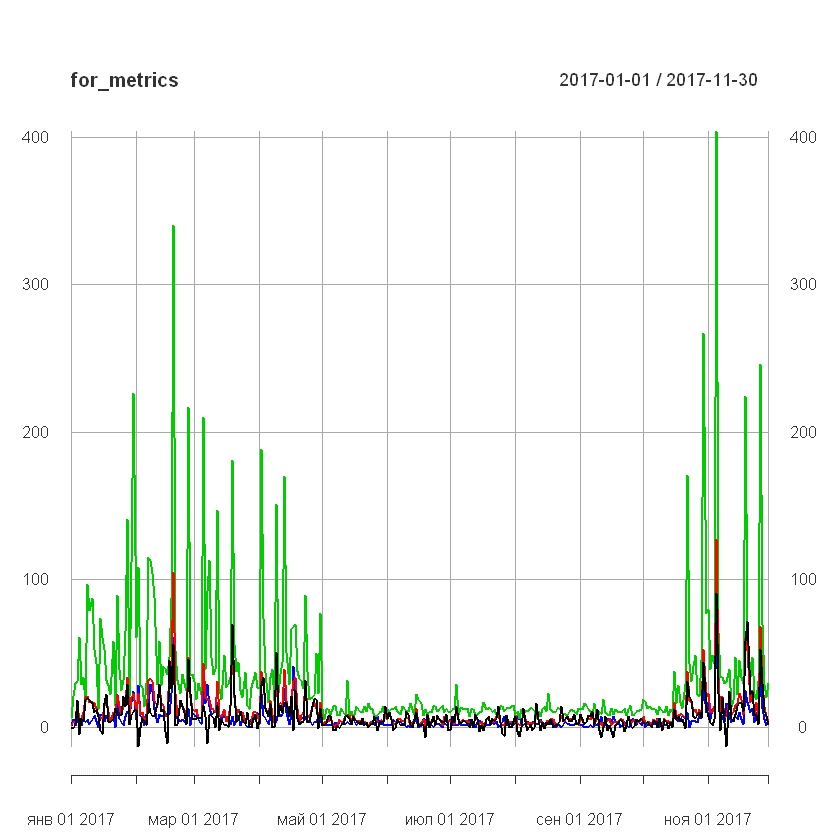

In [64]:
plot(for_metrics)

In [65]:
getSymbols('BIF.CO', src = 'yahoo') # качаем серию

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "BIF.CO"

In [66]:
BIF.CO$BIF.CO.Close['2019-01-01::2019-01-30'] # оставляет данные только за определенный временной промежуток

           BIF.CO.Close
2019-01-02     0.725656
2019-01-03     0.718471
2019-01-04     0.718471
2019-01-07     0.729248
2019-01-08     0.729248
2019-01-09     0.766968
2019-01-10     0.784930
2019-01-11     0.786726
2019-01-14     0.777745
2019-01-15     0.761579
2019-01-16     0.779541
2019-01-17     0.759783
2019-01-18     0.766968
2019-01-21     0.766968
2019-01-22     0.766968
2019-01-23     0.777745
2019-01-24     0.766968
2019-01-25     0.770560
2019-01-28     0.754395
2019-01-29     0.754395
2019-01-30     0.763375

In [67]:
for_plot <- merge(BIF.CO$BIF.CO.Close['2019-01-01::2019-01-30'], for_metrics)

In [68]:
for_metrics$Volume <- for_metrics$Positive + for_metrics$Neutral + for_metrics$Negative # добавляем метрики 

In [69]:
for_metrics$Ratio <- for_metrics$Positive / for_metrics$Negative

In [70]:
for_metrics$Polarity <- (for_metrics$Positive - for_metrics$Negative) / (for_metrics$Positive + for_metrics$Negative)

In [71]:
for_metrics$Composite <- (for_metrics$Positive - for_metrics$Negative) / for_metrics$Volume

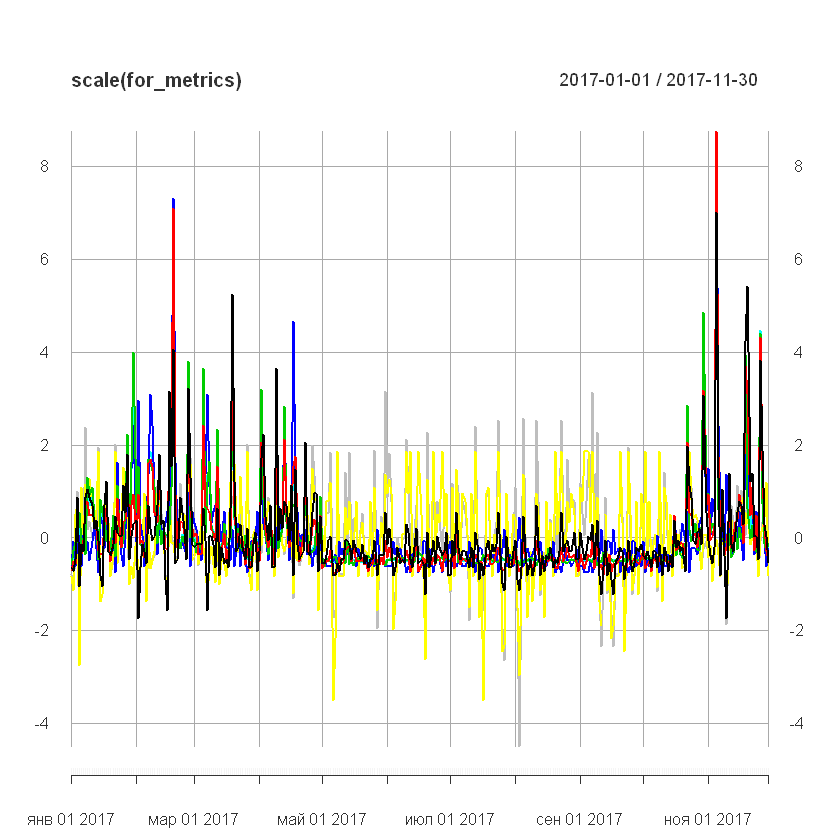

In [72]:
plot(scale(for_metrics))

In [77]:
for_plot <- merge(BIF.CO$BIF.CO.Close['2017-01-01::2017-11-26'], for_metrics)

In [78]:
tail(tweets1)

,Date,Text,Likes,Retweets
,<date>,<fct>,<dbl>,<dbl>
22751,2017-11-26,22 years ago had @aabsportdk journey home from Brondby Stadium without points http://www.brondbystats.dk/Match/Details/507 ...,0,0
22753,2017-11-26,Mukhtar: Silkeborg-bane anderledes men ok https://www.bold.dk/fodbold/nyheder/mukhtar-silkeborg-bane-anderledes-men-ok/ … #sldk #brondby #SilkeborgIF,0,0
22756,2017-11-26,.@DanielNorouzi med en opfordring til @BrondbyIF’s unge spillere: http://3point.dk/norouzi-med-opfordring-til-broendbys-unge-spillere-grib-chancen-og-nyd-at-vaere-i-danmarks-fedeste-klub/ … #bif #brondby,4,0
22757,2017-11-26,"Mukhtar inden Silkeborg-kampen: - Det foles forskelligt at spille pa kunst i forhold til et naturligt underlag, men Silkeborg gav os muligheden for at tr<U+00E6>ne pa deres stadion lordag https://brondby.com/nyhed/2017/11/26/Mukhtar-Anderledes-men … ok #Brondby",33,1
22758,2017-11-26,"Onsker for denne runde: Horsens point i Farum, Lyngby point i Telia Parken, Brondby sejr samt et mirakulost AGF point i Herning ! #Brondby",7,0
22759,2017-11-26,Silkeborg plagued by injuries: Dennis Flinta misses the Brondby-reunion while He and Nilsson are with http://3point.dk/silkeborg-plaget-af-skader-dennis-flinta-misser-broendby-gensyn-mens-sikosek-og-nilsson-er-med/ ...,0,0


In [79]:
head(for_plot)

           BIF.CO.Close Score Positive Neutral Negative Volume     Ratio
2017-01-01           NA     0        1       6        1      8 1.0000000
2017-01-02     0.489458    -1        4      21        5     30 0.8000000
2017-01-03     0.493949     2        3      30        1     34 3.0000000
2017-01-04     0.493949    18       18      31        5     54 3.6000000
2017-01-05     0.489458    -5        1      61        6     68 0.1666667
2017-01-06     0.493949     6        6      29        1     36 6.0000000
             Polarity   Composite
2017-01-01  0.0000000  0.00000000
2017-01-02 -0.1111111 -0.03333333
2017-01-03  0.5000000  0.05882353
2017-01-04  0.5652174  0.24074074
2017-01-05 -0.7142857 -0.07352941
2017-01-06  0.7142857  0.13888889

In [80]:
plot(for_plot) # Понял, что облажался :D

ERROR: Error in plot.window(c(1483228800, 1.512e+09), c(NaN, NaN)): нужны конечные значения 'ylim'


In [128]:
prelim <- as.data.frame(for_plot)

In [129]:
prelim <- prelim[complete.cases(prelim),]

In [137]:
# prelim$Ratio <- NULL !!!!!!!!!!!!!!!!!!!!!!

In [130]:
for (i in 1:9) {
    prelim[,i] <- scale(prelim[,i])
}

In [138]:
prelim

,BIF.CO.Close,Score,Positive,Neutral,Negative,Volume,Polarity,Composite
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
2017-01-02,-1.5657732,-0.81746298,-0.64116746,-0.26087336,-0.02605144,-0.32375182,-1.13103019,-1.0276727206
2017-01-03,-1.5111857,-0.48570357,-0.76036895,0.02862380,-0.76526104,-0.22873997,0.52257841,-0.3370351174
2017-01-04,-1.5111857,1.28367994,1.02765334,0.06079015,-0.02605144,0.24631926,0.69905048,1.0262802460
2017-01-05,-1.5657732,-1.25980886,-0.99877192,1.02578071,0.15875096,0.57886072,-2.76316336,-1.3289082710
2017-01-06,-1.5111857,-0.04335769,-0.40276449,-0.00354255,-0.76526104,-0.18123405,1.10241519,0.2629869138
2017-01-09,-1.6203485,1.50485288,1.38525780,2.18376938,-0.02605144,1.88527360,0.83479822,0.1969815037
2017-01-10,-1.1291218,1.28367994,0.90845185,1.60477504,-0.58045864,1.29144956,1.30586670,0.3691965611
2017-01-11,-0.2012559,1.06250701,0.90845185,1.86210586,-0.02605144,1.55273214,0.64557409,0.0471767056
2017-01-12,-0.4195694,0.39898819,0.78925037,0.76844989,0.52835576,0.79263737,0.07159425,0.0007456391


In [139]:
compl <- prelim

In [140]:
compl <- as.ts(compl)

In [141]:
nrow(compl)

[1] 227

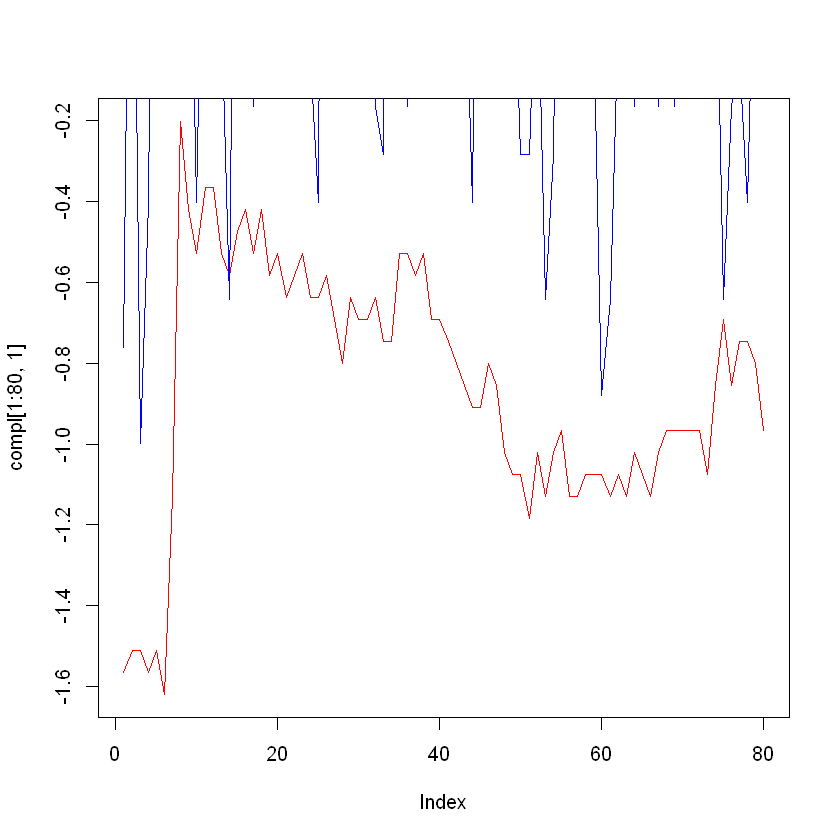

In [155]:
plot(compl[1:80,1], col = 'red', t = 'l')
lines(compl[-1,3][1:80], col = 'blue') # надо крутить и думать 

In [156]:
cor(compl)

,BIF.CO.Close,Score,Positive,Neutral,Negative,Volume,Polarity,Composite
BIF.CO.Close,1.000000000,-0.008256958,-0.1048780,-0.18311079,-0.09635861,-0.16850044,-0.02558432,0.001139086
Score,-0.008256958,1.000000000,0.7715176,0.39042540,0.16778429,0.46361007,0.48517719,0.560056234
Positive,-0.104877955,0.771517594,1.0000000,0.74426587,0.71192504,0.84036888,0.17128038,0.251709536
Neutral,-0.183110787,0.390425401,0.7442659,1.00000000,0.75319144,0.98355809,-0.05325068,-0.083639639
Negative,-0.096358606,0.167784289,0.7119250,0.75319144,1.00000000,0.82658271,-0.37497824,-0.314167855
Volume,-0.168500444,0.463610071,0.8403689,0.98355809,0.82658271,1.00000000,-0.05338850,-0.051985994
Polarity,-0.025584318,0.485177188,0.1712804,-0.05325068,-0.37497824,-0.05338850,1.00000000,0.873289811
Composite,0.001139086,0.560056234,0.2517095,-0.08363964,-0.31416785,-0.05198599,0.87328981,1.000000000


In [157]:
compl1 <- as.data.frame(compl)

In [158]:
head(compl1)

,BIF.CO.Close,Score,Positive,Neutral,Negative,Volume,Polarity,Composite
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.565773,-0.81746298,-0.6411675,-0.26087336,-0.02605144,-0.3237518,-1.1310302,-1.0276727
2,-1.511186,-0.48570357,-0.7603689,0.02862380,-0.76526104,-0.2287400,0.5225784,-0.3370351
3,-1.511186,1.28367994,1.0276533,0.06079015,-0.02605144,0.2463193,0.6990505,1.0262802
4,-1.565773,-1.25980886,-0.9987719,1.02578071,0.15875096,0.5788607,-2.7631634,-1.3289083
5,-1.511186,-0.04335769,-0.4027645,-0.00354255,-0.76526104,-0.1812341,1.1024152,0.2629869
6,-1.620349,1.50485288,1.3852578,2.18376938,-0.02605144,1.8852736,0.8347982,0.1969815


In [151]:
for (i in 2:nrow(compl1)) { # все метрики перевожу в лаговые
        compl1[(i-1),1] <- compl1[i,1]
}


In [153]:
cor(compl1[1:80,])

,BIF.CO.Close,Score,Positive,Neutral,Negative,Volume,Polarity,Composite
BIF.CO.Close,1.00000000,0.1633899,0.2995174,0.2590573,0.1958476,0.2830786,0.09483374,0.08508273
Score,0.16338985,1.0000000,0.6396198,0.1192406,-0.2044277,0.1793412,0.72737106,0.78956311
Positive,0.29951742,0.6396198,1.0000000,0.5862186,0.5730704,0.7187892,0.29961820,0.37144106
Neutral,0.25905734,0.1192406,0.5862186,1.0000000,0.6916340,0.9785952,-0.13679202,-0.20549911
Negative,0.19584758,-0.2044277,0.5730704,0.6916340,1.0000000,0.7840022,-0.47916320,-0.43693812
Volume,0.28307861,0.1793412,0.7187892,0.9785952,0.7840022,1.0000000,-0.12039749,-0.15389982
Polarity,0.09483374,0.7273711,0.2996182,-0.1367920,-0.4791632,-0.1203975,1.00000000,0.91496365
Composite,0.08508273,0.7895631,0.3714411,-0.2054991,-0.4369381,-0.1538998,0.91496365,1.00000000


In [79]:
cop <- read_xlsx('C:/Users/Митя/cop.xlsx') # биржа Копенгагена (можно было скачать и через getSymbols)

In [81]:
cop <- as.data.frame(cop)

In [82]:
head(cop)

,Date,High,Low,Close
,<dttm>,<chr>,<chr>,<chr>
1,2019-01-02,1008.48,988.94,1004.76
2,2019-01-03,1003.54,990.87,995.37
3,2019-01-04,1020.17,996.57,1020.17
4,2019-01-07,1029.93,1013.67,1027.82
5,2019-01-08,1044.59,1026.74,1037.40
6,2019-01-09,1056.80,1038.73,1044.04


In [84]:
cop$Date <- as.Date(cop$Date)

In [85]:
cop$High <- as.numeric(cop$High)
cop$Low <- as.numeric(cop$Low)
cop$Close <- as.numeric(cop$Close)

In [86]:
cop <- to_xts(cop)

In [87]:
# будем убирать линию тренда биржи из акций нашей 

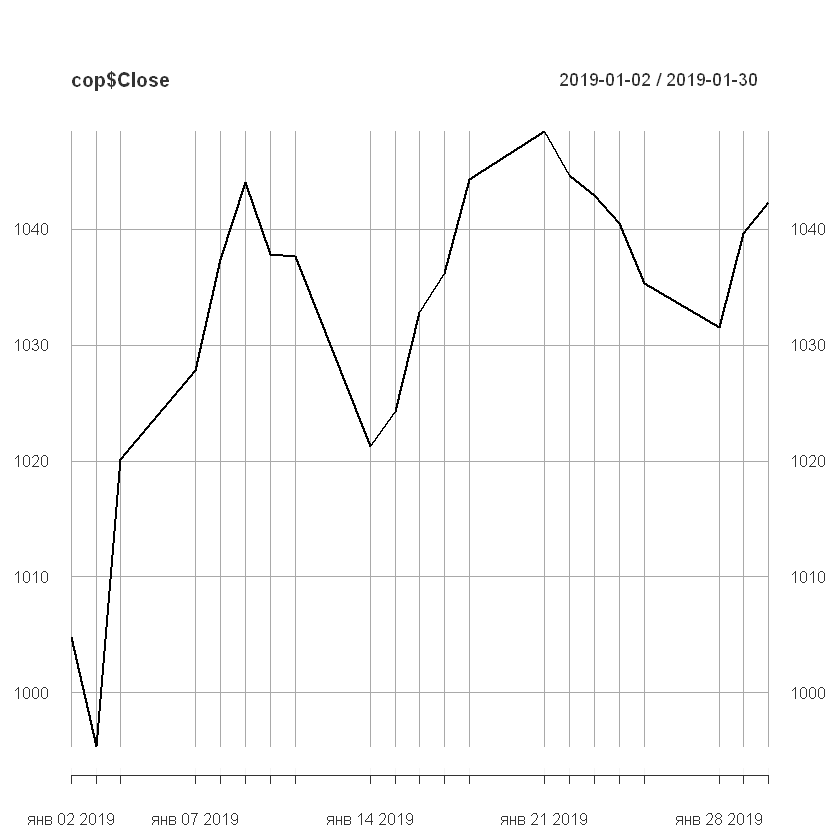

In [88]:
plot(cop$Close, t = 'l')

In [326]:
cop

Date,High,Low,Close
<dttm>,<chr>,<chr>,<chr>
2019-01-02,1008.48,988.94,1004.76
2019-01-03,1003.54,990.87,995.37
2019-01-04,1020.17,996.57,1020.17
2019-01-07,1029.93,1013.67,1027.82
2019-01-08,1044.59,1026.74,1037.40
2019-01-09,1056.80,1038.73,1044.04
2019-01-10,1042.59,1032.47,1037.85
2019-01-11,1046.97,1033.27,1037.65
2019-01-14,1036.17,1019.42,1021.22


In [98]:
cop <- cop$Close

In [99]:
getSymbols('^OMX', scr='yahoo')

Warning message:
"^OMX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


[1] "^OMX"

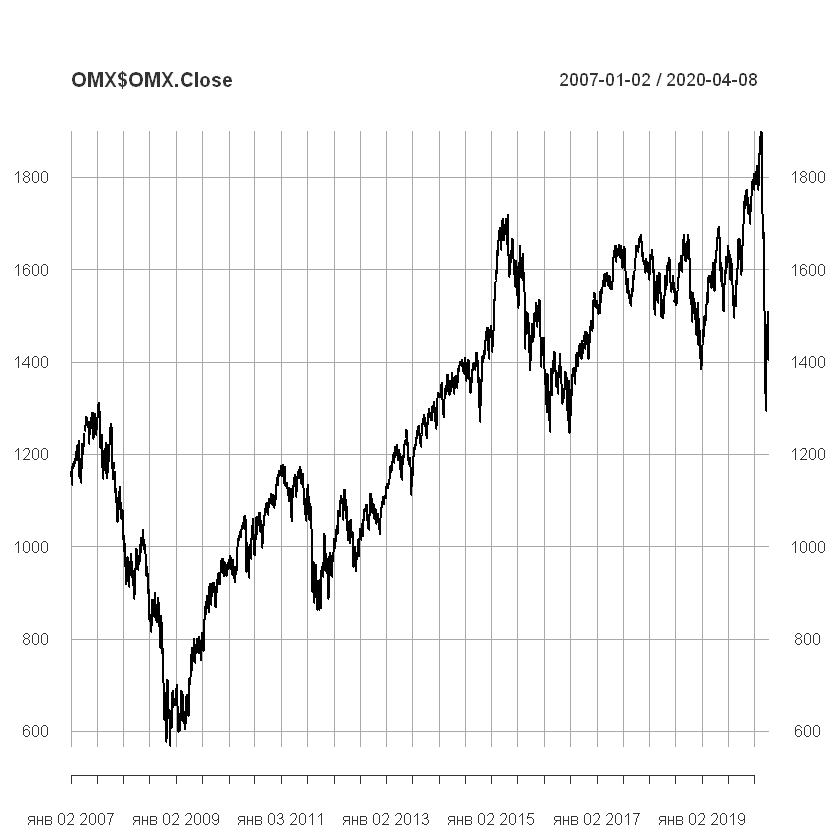

In [100]:
plot(OMX$OMX.Close)

In [101]:
cop1 <- OMX$OMX.Close

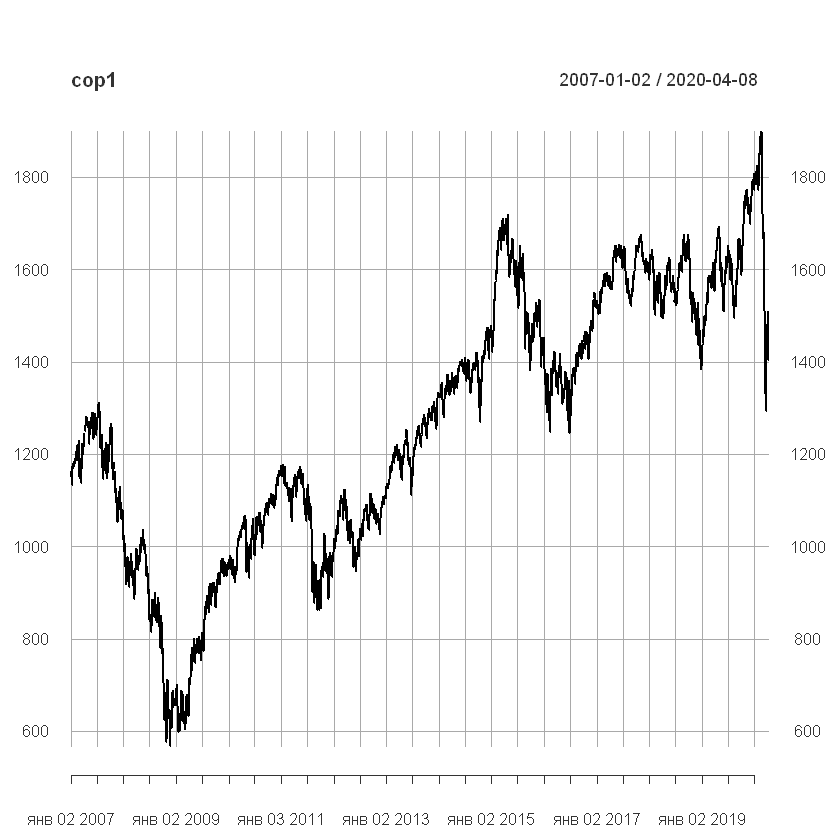

In [102]:
plot(cop1)

In [103]:
cop1 <- cop1['2019-01-01::2019-01-30']

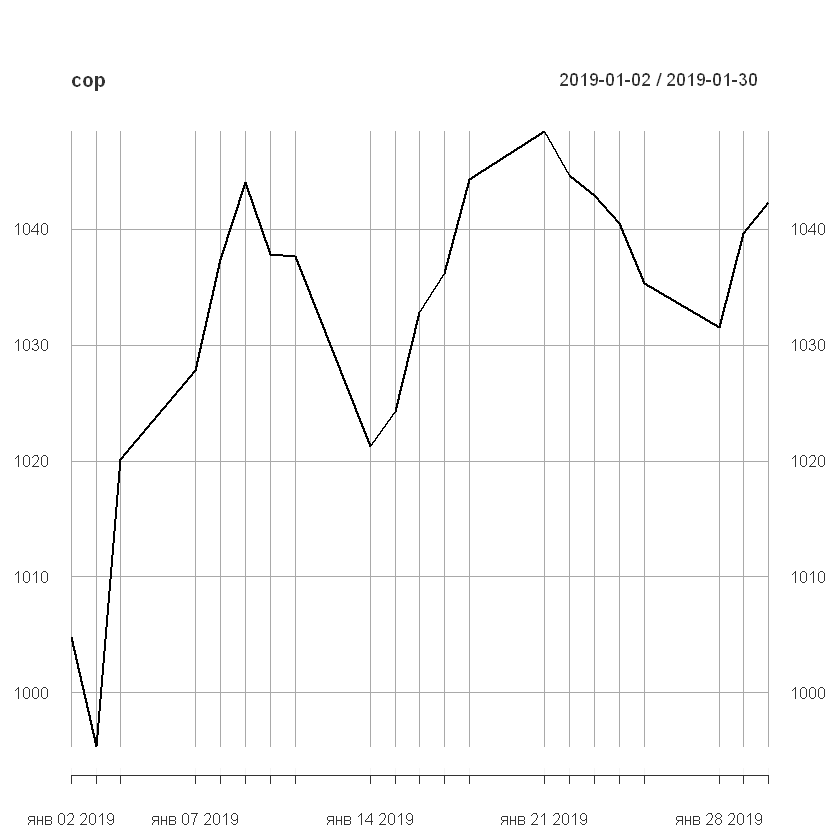

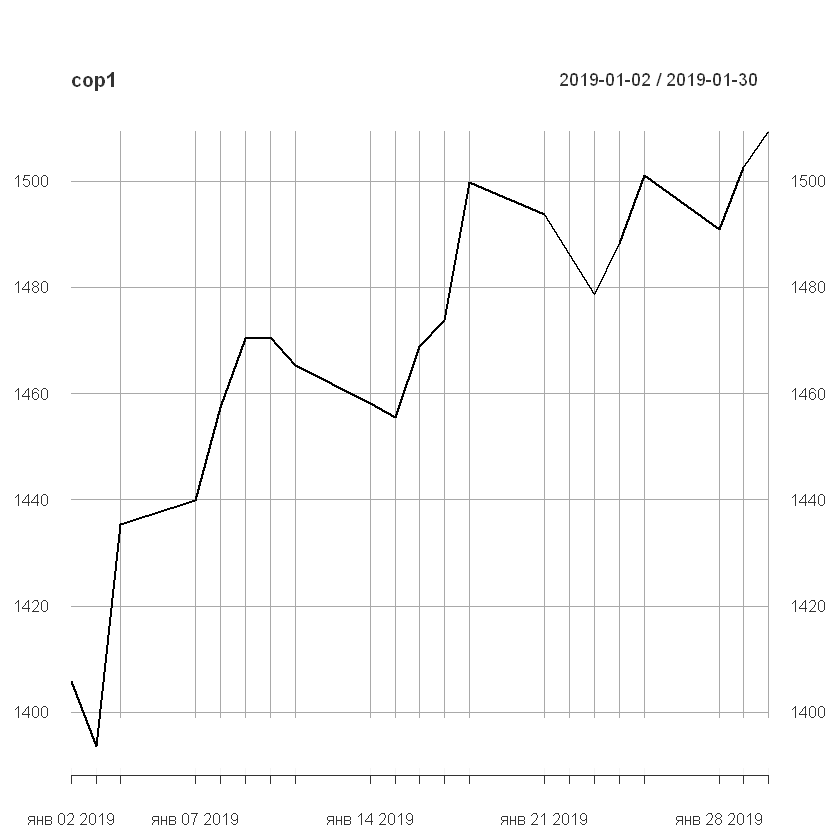

In [105]:
plot(cop)
plot(cop1)

In [118]:
compl1$OMXC25 <- scale(cop[-21])

In [119]:
compl1$OMXC <- scale(cop1[-21])

In [138]:
compl1

,BIF.CO.Close,Score,Positive,Neutral,Negative,Volume,Ratio,Polarity,Composite,OMXC25,OMXC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<xts>,<xts>
1,-1.85775810,-0.4488744,-1.1966373,-0.60699987,-1.21609394,-0.894623339,1.11304143,1.0811224,0.41988470,-2.02786288,-2.03704587
2,-1.85775810,0.5869896,0.7398297,-0.29235631,-0.07600587,-0.085867865,0.10588508,0.4349918,0.75202975,-2.71818979,-2.44883516
3,-1.35652572,-0.2417016,-0.0049653,-0.13503453,0.68405284,0.003993854,-0.84023149,-0.8656609,-0.70789556,-0.89496216,-1.05382236
4,-1.35652572,2.0371993,0.7398297,-0.64633032,-0.45603523,-0.415360836,0.74680276,0.8918518,1.60464341,-0.33255525,-0.89885762
5,0.39781086,0.0690576,0.5908707,-0.44967809,1.06408219,-0.055913959,-0.77047175,-0.7225150,-0.37555887,0.37173994,-0.31306883
6,1.23321366,-0.9668064,-1.0476783,0.57291348,-0.83606458,0.093855574,-0.16879393,0.1638880,-0.59099151,0.85989443,0.12243543
7,1.31674464,0.0690576,-0.1539243,0.14027859,0.11400881,0.093855574,-0.59607238,-0.4093835,-0.44658062,0.40482270,0.12844467
8,0.89904324,2.2443721,3.4210917,4.50595800,2.58419961,4.527033728,-0.51838539,-0.2872109,-0.55590101,0.39011925,-0.04722223
9,0.14717141,1.3120944,0.8887887,1.00554838,-0.45603523,0.872657141,0.86888231,0.9594485,0.34453989,-0.81776905,-0.29102537


In [131]:
m1 <- lm(BIF.CO.Close ~ Neutral + Composite + OMXC25, data = compl1)

In [132]:
summary(m1)


Call:
lm(formula = BIF.CO.Close ~ Neutral + Composite + OMXC25, data = compl1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93553 -0.34641 -0.04949  0.28434  1.32757 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.05060    0.14027   0.361 0.723034    
Neutral      0.14001    0.13645   1.026 0.320100    
Composite   -0.09034    0.18013  -0.502 0.622820    
OMXC25       0.71004    0.14402   4.930 0.000151 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6107 on 16 degrees of freedom
Multiple R-squared:  0.6603,	Adjusted R-squared:  0.5966 
F-statistic: 10.36 on 3 and 16 DF,  p-value: 0.0004949


In [137]:
compl2 <- diff(compl1)[-1,]

ERROR: Error in r[i1] - r[-length(r):-(length(r) - lag + 1L)]: нечисловой аргумент для бинарного оператора


In [128]:
compl2 <- as.data.frame(compl2)

In [159]:
m1 <- lm(BIF.CO.Close ~. , data = compl1)

In [135]:
compl2

BIF.CO.Close,Score,Positive,Neutral,Negative,Volume,Ratio,Polarity,Composite
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00000000,-0.8286912,-0.744795,0.1573218,0.7600587,0.08986172,-0.94611657,-1.3006526,-1.4599253
0.50123238,2.2789009,0.744795,-0.5112958,-1.1400881,-0.41935469,1.58703425,1.7575127,2.3125390
0.00000000,-1.9681417,-0.148959,0.1966522,1.5201174,0.35944688,-1.51727450,-1.6143669,-1.9802023
1.75433658,-1.0358640,-1.638549,1.0225916,-1.9001468,0.14976953,0.60167782,0.8864030,-0.2154326
0.83540280,1.0358640,0.893754,-0.4326349,0.9500734,0.00000000,-0.42727845,-0.5732715,0.1444109
0.08353098,2.1753145,3.575016,4.3656794,2.4701908,4.43317815,0.07768699,0.1221726,-0.1093204
-0.41770140,-0.9322776,-2.532303,-3.5004096,-3.0402348,-3.65437659,1.38726770,1.2466594,0.9004409
-0.75187182,-1.4502097,-1.787508,-1.1799134,0.0000000,-1.25806407,-1.46495469,-1.3688320,-0.8950964
0.83540280,0.8286912,1.191672,-0.4719653,-0.3800294,-0.17972344,2.07535248,1.6453637,2.2701392


In [160]:
summary(m1)


Call:
lm(formula = BIF.CO.Close ~ ., data = compl1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6170 -0.8327 -0.4402  1.0041  2.2485 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -6.491e-17  6.509e-02   0.000   1.0000  
Score        4.809e-01  1.992e-01   2.415   0.0166 *
Positive    -6.011e-01  3.107e-01  -1.935   0.0543 .
Neutral     -2.561e-01  1.171e-01  -2.187   0.0298 *
Negative     4.421e-01  2.215e-01   1.996   0.0472 *
Volume              NA         NA      NA       NA  
Polarity    -1.818e-02  1.465e-01  -0.124   0.9013  
Composite    1.648e-02  1.502e-01   0.110   0.9128  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9807 on 220 degrees of freedom
Multiple R-squared:  0.06384,	Adjusted R-squared:  0.03831 
F-statistic: 2.501 on 6 and 220 DF,  p-value: 0.0232
